<div style="font-family: Arial; background-color: #f0f0f0; border: 3px solid #000000; padding: 20px; text-align: center;">
    <h1 style="color: #ff0000; font-size: 60px;"><b>Ataque al corazón</b></h1>
    <hr style="border-top: 5px solid #ff0000;">
    <h2 style="font-size: 24px; color: #000000; text-align: left;">David Fernández Reboredo</h2>
    <img src="https://th.bing.com/th/id/OIG2.rqNtPqD4zr0PfKH_SFt6?pid=ImgGn" alt="David Fernández Reboredo" style="max-width: 50%; display: block; margin: auto; border: 2px solid #000000;">
</div>


<div style="font-family:Trebuchet MS; background-color: #dbe3ed; padding: 10px; border-radius: 5px;">
    <h2 style='color:#ff0000;'>Índice</h2>
    <hr style="border-top:2px solid #ff0000;">
</div>


1. [FITS](#FITS)
3. [MATRIZ_DE_CORRELACION](#MATRIZ_DE_CORRELACION)
4. [ENTRENAMIENTO](#ENTRENAMIENTO)


## FITS

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split

def train(pd):
    pd = pd.copy()											
    y = pd["output"].copy()
    x = pd.drop(['output'],axis=1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

    print(f'({len(x_train)+len(y_train)},{(len(x_test)+len(y_test))})')

    return x_train, y_train,x_test,y_test

def regresion_lineal(pd):
    print('------------Regresion Lineal-------------')
    x_train,y_train,x_test,y_test=train(pd)

    scaler = StandardScaler()

    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    lin_reg= LinearRegression()

    lin_reg.fit(x_train,y_train)

    predicciones = lin_reg.predict(x_train)

    mse = mean_squared_error(y_train, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_train, predicciones)

    score = r2_score(y_train, predicciones)

    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def arbol_de_regresion_test(pd):
    print('----------Arbol de regresión-----------')
    x_train,y_train,x_test,y_test=train(pd)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(x_train, y_train)

    predicciones = tree_reg.predict(x_train)

    mse = mean_squared_error(y_train, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_train, predicciones)
    score = r2_score(y_train, predicciones)
    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def arbol_decision(pd):
    # cross-validation arbol decision
    print('---------------Arbol de decision---------------')
    x_train,y_train,x_test,y_test=train(pd)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(x_train, y_train)
    lin_score = cross_val_score(tree_reg, x_train, y_train,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-lin_score)
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    predicciones = tree_reg.predict(x_test)

    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)

    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def random_forest(pd):
    print('---------------Random forest---------------')
    x_train,y_train,x_test,y_test=train(pd)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    rf_reg = RandomForestRegressor(n_estimators=100)
    rf_reg.fit(x_train, y_train)

    rf_score = cross_val_score(rf_reg, x_test, y_test,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-rf_score)
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    predicciones = rf_reg.predict(x_test)

    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)

    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def regresion_svr(pd):
    print('---------------Regresion svr---------------')
    x_train,y_train,x_test,y_test=train(pd)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    sv_reg = SVR()

    sv_reg.fit(x_train, y_train)
    predicciones = sv_reg.predict(x_test)

    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)
    rf_score = cross_val_score(sv_reg, x_train, y_train,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-rf_score)
    print("SV cross")
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def xgboost(pd):
    print('---------------Xboost---------------')
    x_train,y_train,x_test,y_test=train(pd)
    # scaler = StandardScaler()
    # x_train = scaler.fit_transform(x_train)
    # x_test = scaler.transform(x_test)
    xgb_reg = xgb.XGBRegressor()
    xgb_reg.fit(x_train, y_train)
    predicciones = xgb_reg.predict(x_test)
    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)
    rf_score = cross_val_score(xgb_reg, x_train, y_train,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-rf_score)
    print("XGB cross")
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

In [7]:
import matplotlib.pyplot as plt
def boxplot_general(pd,cadena):
    for tipo in pd.columns:
        if tipo !=cadena:
            data_to_plot = [pd[pd[cadena] == i][tipo].values for i in sorted(pd[cadena].unique())]
            plt.figure(figsize=(10, 6))
            plt.boxplot(data_to_plot, labels=sorted(pd[cadena].unique()),notch=True,patch_artist=True,
                        showmeans=True,whiskerprops=dict(color='deeppink',linewidth=1),
                        medianprops=dict(color='deeppink'),
                        flierprops=dict(color='deeppink', markerfacecolor='pink', linestyle= "none", markeredgecolor="none", markersize=9),
                        boxprops=dict(edgecolor='deeppink',  facecolor='pink', linewidth=2),
                        capprops=dict(color='deeppink', linewidth=2)
                        )
            plt.xlabel(cadena)
            plt.ylabel(f'{tipo}')
            plt.title(f'Boxplot Quality/ {tipo}')
            plt.show()
def boxplot(pd,y,x):
        data_to_plot = [pd[pd[x] == i][y].values for i in sorted(pd[x].unique())]
        plt.figure(figsize=(10, 6))
        plt.boxplot(data_to_plot, labels=sorted(pd[x].unique()),notch=True,patch_artist=True,
                    showmeans=True,whiskerprops=dict(color='deeppink',linewidth=1),
                    medianprops=dict(color='deeppink'),
                    flierprops=dict(color='deeppink', markerfacecolor='pink', linestyle= "none", markeredgecolor="none", markersize=9),
                    boxprops=dict(edgecolor='deeppink',  facecolor='pink', linewidth=2),
                    capprops=dict(color='deeppink', linewidth=2)
                    )
        plt.xlabel(x)
        plt.ylabel(f'{y}')
        plt.title(f'Boxplot Quality/ {y}')
        plt.show()
def mapa_calor(corr_matrix):
  fig, ax = plt.subplots(figsize=(15, 8))
  text_colors = ("black" , "white" )
  im = ax.imshow(corr_matrix, cmap= "Oranges" ) # mapa de calor
  cbar = fig.colorbar(im, ax=ax, label= "Correlacion" ) # leyenda
  cbar.outline.set_visible(False)

  x = corr_matrix.columns
  y = corr_matrix.index
  # Mostrar las etiquetas. El color del texto cambia en función de su normalización
  for i in range(len(y)):
    for j in range(len(x)):
      value = corr_matrix.iloc[i, j]
      text_color = text_colors[int(im.norm(value) > 0.5)] # color etiqueta
      ax.text(j, i, f"{value:.2f}" , color=text_color, va= "center" , ha= "center" )



  # Formateo de los ejes
  ax.set_xticks(range(len(x)))
  ax.set_xticklabels(x, rotation=90)
  ax.set_yticks(range(len(y)))
  ax.set_yticklabels(y)
  ax.invert_yaxis()
  ax.spines["right"].set_visible(False) # ocultar borde derecho
  ax.spines["top"].set_visible(False) # ocultar borde superior
  fig.tight_layout()

In [8]:
import pandas as pd

heart_df = pd.read_csv('heart.csv')
heart_df



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
heart_df.shape

(303, 14)

In [11]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

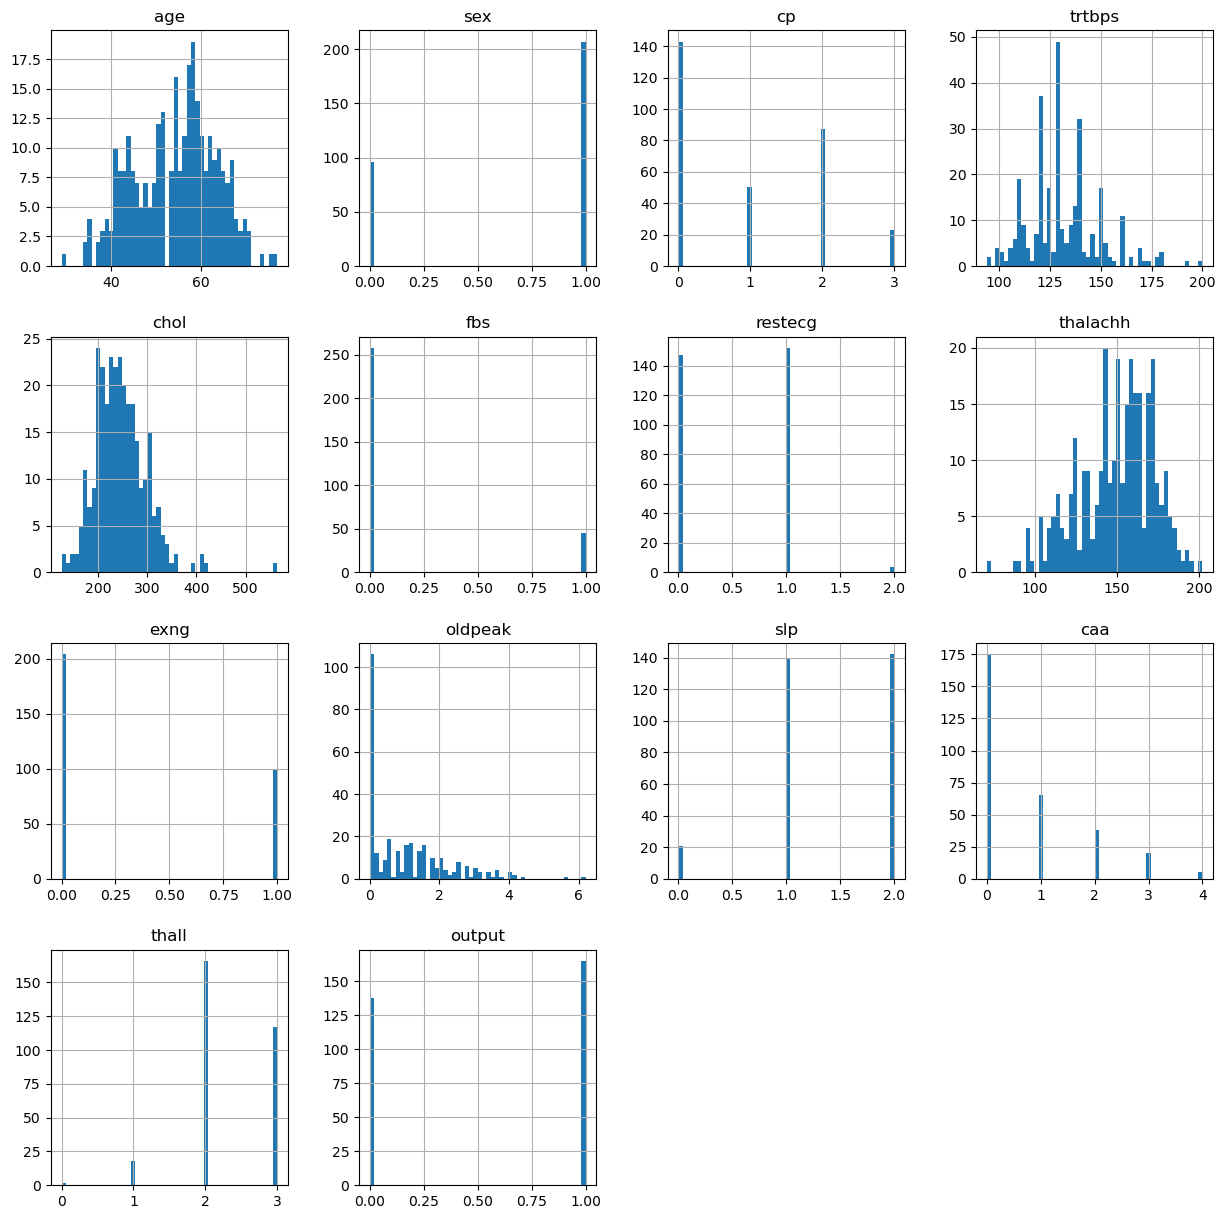

In [12]:
heart_df.hist(bins=50, figsize=(15,15))

In [13]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# MATRIZ_DE_CORRELACION

In [14]:
corr_matrix= heart_df.corr()
corr_matrix

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


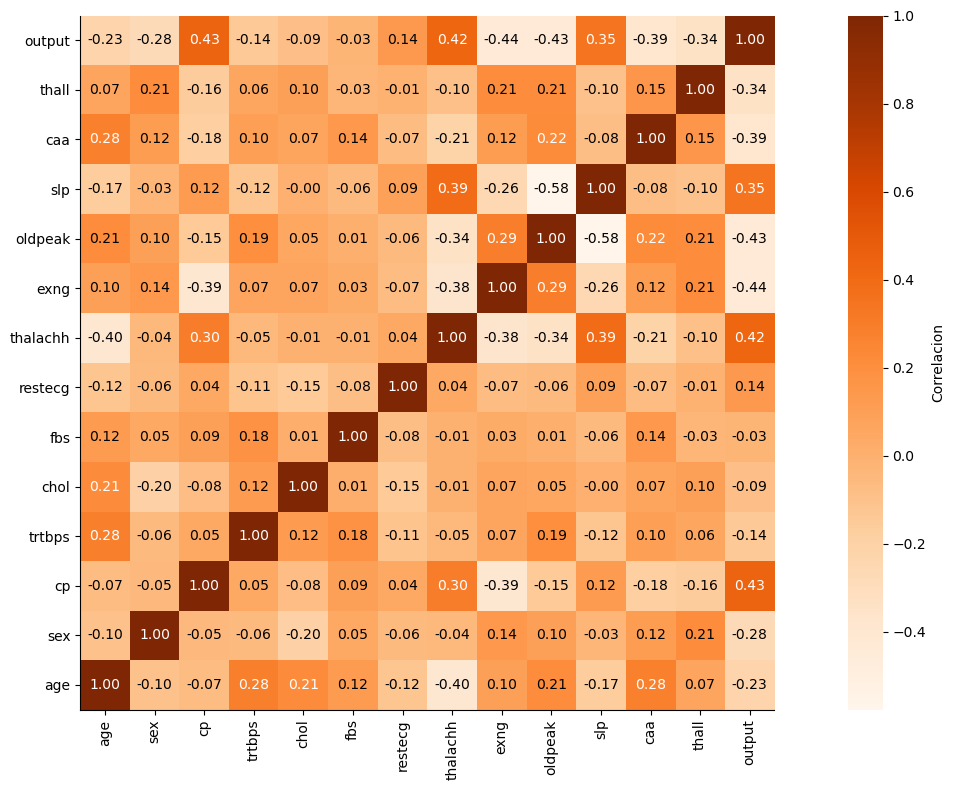

In [15]:
mapa_calor(corr_matrix)

In [16]:

h = heart_df[heart_df['sex']==1]
m = heart_df[heart_df['sex']==0]



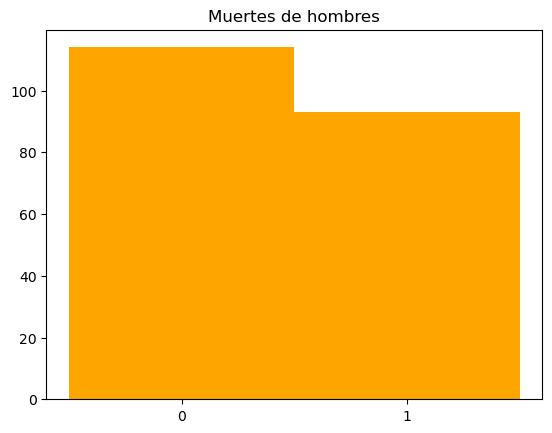

In [17]:
plt.hist(h['output'], bins=[-0.5, 0.5, 1.5],color='orange') 
plt.xticks([0, 1]) 
plt.title('Muertes de hombres')
plt.show()

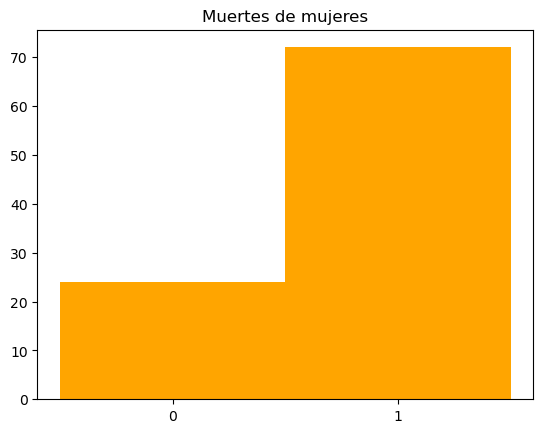

In [18]:
plt.hist(m['output'], bins=[-0.5, 0.5, 1.5],color='orange') 
plt.xticks([0, 1]) 
plt.title('Muertes de mujeres')
plt.show()

In [19]:
heart_df = heart_df.drop(['chol','fbs'],axis=1)

# ENTRENAMIENTO

In [20]:
import numpy as np
x_train, y_train,x_test,y_test=train(heart_df)

(454,152)


In [21]:
y_train=(y_train==1)
y_train

254    False
200    False
265    False
261    False
68      True
       ...  
225    False
98      True
175    False
272    False
25      True
Name: output, Length: 227, dtype: bool

In [22]:
y_test=(y_test==1)
y_test

121     True
241    False
243    False
43      True
276    False
       ...  
294    False
135     True
125     True
213    False
283    False
Name: output, Length: 76, dtype: bool

In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
#sgd_clf.fit(x_train, y_train)


In [24]:
from sklearn.model_selection import cross_val_score
ret = cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")
print(np.mean(ret))

0.5108187134502923


# Matriz de confusion

In [25]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[72, 34],
       [49, 72]], dtype=int64)

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))

0.6792452830188679
0.5950413223140496
0.6343612334801761


0.8022766256042415


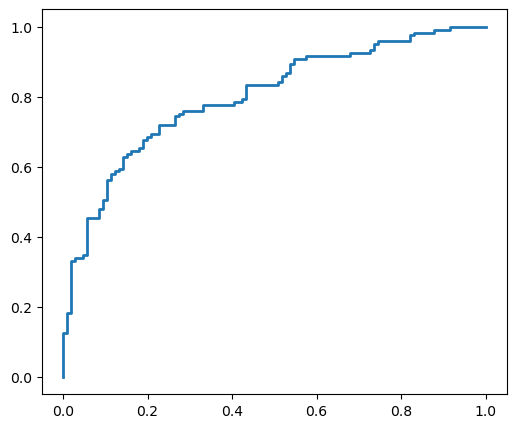

In [28]:
from sklearn.metrics import roc_curve

#y_for = cross_val_predict(sgd_clf, x_train, y_train, cv=3, method="predict_proba")
sgd_clf.fit(x_train, y_train)
y_for = sgd_clf.decision_function(x_train)
#y_scores = y_for[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_for)
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
print(roc_auc_score(y_train, y_for))
#y_for

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
ret = cross_val_score(forest_clf, x_train, y_train, cv=3, scoring="accuracy")
print(np.mean(ret))

y_train_forest = cross_val_predict(forest_clf, x_train, y_train, cv=3)
#print(roc_auc_score(y_train, y_scores_forest))
print(precision_score(y_train, y_train_forest))
print(recall_score(y_train, y_train_forest))


0.8148538011695906
0.824
0.8512396694214877


In [30]:

y_probas_forest = cross_val_predict(forest_clf, x_train, y_train, cv=3,
                                    method="predict_proba")
y_probas_forest

array([[0.12, 0.88],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.46, 0.54],
       [0.  , 1.  ],
       [0.49, 0.51],
       [0.26, 0.74],
       [0.11, 0.89],
       [0.3 , 0.7 ],
       [0.57, 0.43],
       [0.42, 0.58],
       [0.23, 0.77],
       [0.64, 0.36],
       [0.33, 0.67],
       [0.96, 0.04],
       [0.37, 0.63],
       [0.18, 0.82],
       [0.55, 0.45],
       [0.85, 0.15],
       [0.99, 0.01],
       [0.53, 0.47],
       [0.74, 0.26],
       [0.49, 0.51],
       [0.3 , 0.7 ],
       [0.63, 0.37],
       [0.39, 0.61],
       [0.02, 0.98],
       [0.64, 0.36],
       [0.17, 0.83],
       [0.48, 0.52],
       [0.19, 0.81],
       [0.62, 0.38],
       [0.64, 0.36],
       [0.36, 0.64],
       [0.  , 1.  ],
       [0.93, 0.07],
       [0.17, 0.83],
       [0.1 , 0.9 ],
       [0.44, 0.56],
       [0.22, 0.78],
       [0.95, 0.05],
       [0.7 , 0.3 ],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.04, 0.96],
       [0.44, 0.56],
       [0.07, 0.93],
       [0.45,

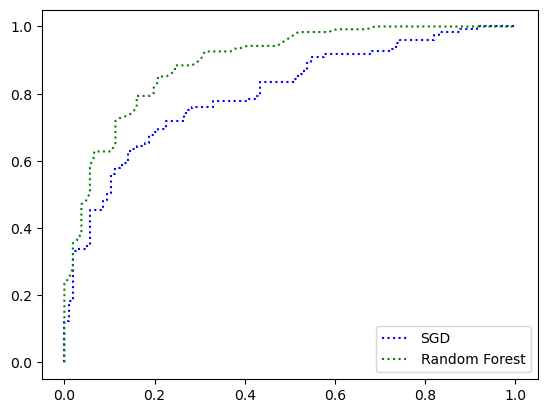

In [31]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, "g:", label="Random Forest")
plt.legend()
plt.show()

Es mejor el SGD ya que el área que delimita es mayor

In [32]:
print(roc_auc_score(y_train, y_scores_forest))

0.8943162326524248


# Curva de precisión

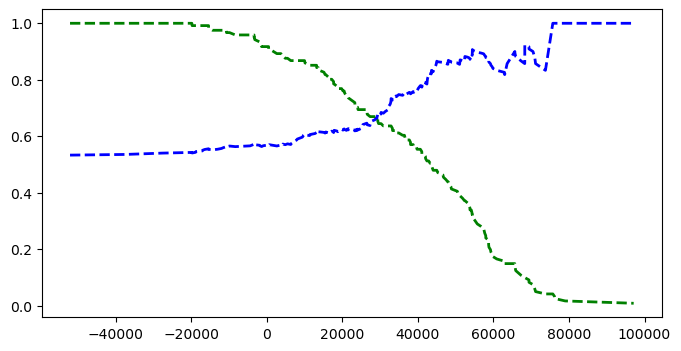

In [33]:
from sklearn.calibration import cross_val_predict
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, x_train, y_train, cv=3,
                             method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)

Text(0, 0.5, 'Precision')

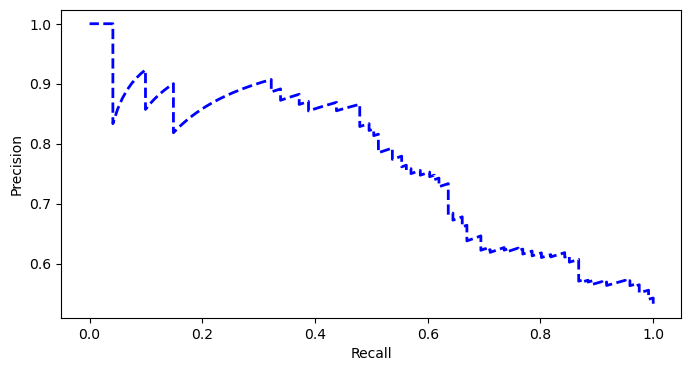

In [34]:
plt.figure(figsize=(8,4))
plt.plot(recalls, precisions, "b--", label="Precision/recall", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [41]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
listaClasificadores=[[KNeighborsClassifier(),'KNeighborsClassifier'],[GradientBoostingClassifier(),'GradientBoostingClassifier'],
                     [XGBClassifier(),'GradientBoostingClassifier'],[AdaBoostClassifier(),'AdaBoostClassifier'],[MLPClassifier(),'MLPClassifier'],
                     [GaussianNB(),'GaussianNB'],[LogisticRegression(),'LogisticRegression']]

# Ejemplos con multiples modelos

(454,152)
----------------------------
Modelo: KNeighborsClassifier
Precisión: 0.7258064516129032
Recall: 0.7317073170731707
ROC_AUC_SCORE:0.7272514071294559
----------------------------
Modelo: GradientBoostingClassifier
Precisión: 0.832
Recall: 0.8455284552845529
ROC_AUC_SCORE:0.9025953721075672
----------------------------
Modelo: XGBClassifier
Precisión: 0.816
Recall: 0.8292682926829268
ROC_AUC_SCORE:0.8954815509693559
----------------------------
Modelo: AdaBoostClassifier
Precisión: 0.8106060606060606
Recall: 0.8699186991869918
ROC_AUC_SCORE:0.8639774859287054
----------------------------
Modelo: MLPClassifier
Precisión: 0.7857142857142857
Recall: 0.8943089430894309
ROC_AUC_SCORE:0.842245153220763
----------------------------
Modelo: GaussianNB
Precisión: 0.824
Recall: 0.8373983739837398
ROC_AUC_SCORE:0.8973577235772359


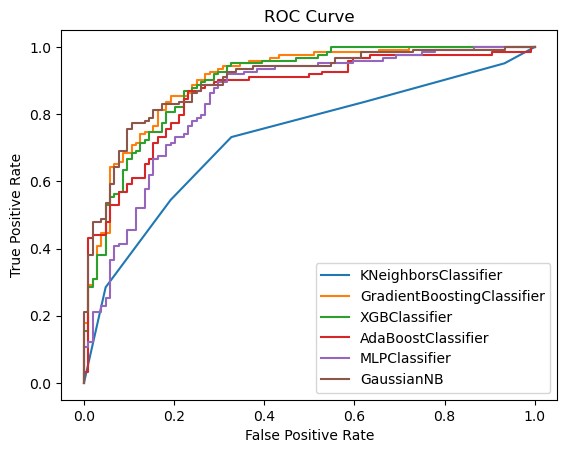

In [56]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

x_train, y_train, x_test, y_test = train(heart_df)

listaClasificadores = [
    [KNeighborsClassifier(), 'KNeighborsClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [XGBClassifier(), 'XGBClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [MLPClassifier(), 'MLPClassifier'],
    [GaussianNB(), 'GaussianNB']
]

for clf, nombre in listaClasificadores:
    print('----------------------------')
    print(f'Modelo: {nombre}')
    ret = cross_val_score(clf, x_train, y_train, cv=3, scoring="accuracy")
    y_train_pred = cross_val_predict(clf, x_train, y_train, cv=3)
    print(f'Precisión: {precision_score(y_train, y_train_pred)}')
    print(f'Recall: {recall_score(y_train, y_train_pred)}')
    

    y_probas = cross_val_predict(clf, x_train, y_train, cv=3, method="predict_proba")
    y_scores = y_probas[:, 1]

    
    fpr, tpr, thresholds = roc_curve(y_train, y_scores)
    print(f'ROC_AUC_SCORE:{roc_auc_score(y_train, y_scores)}')
    plt.plot(fpr, tpr, label=nombre)

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Poderíamos determinar que o GradientBoostingClassifier sería unha opción moi interesante a hora de elexilo como modelo, inda que tamén pode ser boa elección a de GaussianNB